In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<center><h1 style="color:blue">Acea Smart Water Analytics</h1></center>
<center><h1 style="color:cyan">Can you help preserve "blue gold" using data to predict water availability?</h1></center>

<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/24191/logos/header.png?t=2020-11-24-14-43-27"></center>

# 1. Welcome to the Competition

# 1.1 General Introduction

- In this competition we will focus only on the water sector to help Acea Group preserve precious waterbodies. 
- As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. 
- During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies 
- <span style="color:brown">it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.</span>

# 1.2 Data Overview

- The reality is that each waterbody has such unique characteristics that their attributes are not linked to each other. 
- This analytics competition uses datasets that are completely independent from each other. However, it is critical to understand total availability in order to preserve water across the country.
- <span style="color:brown">Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different</span>. 
- So, if for instance we consider a water spring we notice that its features are different from those of a lake. These variances are expected based upon the unique behavior and characteristics of each waterbody.  


- The Acea Group deals with four different type of waterbodies: 
  1. water springs 
  2. lakes
  3. rivers
  4. aquifers.

# 1.3 Challenge

<center><span style="color:red">Can you build a story to predict the amount of water in each unique waterbody?</span></center>

- The challenge is to determine **how features influence the water availability of each presented waterbody**. To be more straightforward, ***gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year***.

- The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

- The desired outcome is a notebook that can generate **four mathematical models**, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F6195295%2Fcca952eecc1e49c54317daf97ca2cca7%2FAcea-Input.png?generation=1606932492951317&alt=media">

# 1.4 Evaluation Criteria: Points to Consider

## Methodology/Completeness (min 0 points, max 5 points)

- Are the statistical models appropriate given the data?
- Did the author develop one or more machine learning models?
- Did the author provide a way of assessing the performance and accuracy of their solution?
- What is the Mean Absolute Error (MAE) of the models?
- What is the Root Mean Square Error (RMSE) of the models?

## Presentation (min 0 points, max 5 points)

- Does the notebook have a compelling and coherent narrative?
- Does the notebook contain data visualizations that help to communicate the author’s main points?
- Did the author include a thorough discussion on the intersection between features and their prediction? For example between rainfall and amount/level of water.
- Was there a discussion of automated insight generation, demonstrating what factors to take into account?
- Is the code documented in a way that makes it easy to understand and reproduce?
- Were all external sources of data made public and cited appropriately?

## Application (min 0 points, max 5 points)

- Is the provided model useful/able to forecast water availability in terms of the level of water flow in a time interval of the year?
- Is the provided methodology applicable also on new datasets belong to another waterbody?

Source: [Evaluation Page](https://www.kaggle.com/c/acea-water-prediction/overview/evaluation)

Head over to the [submission guidelines](https://www.kaggle.com/c/acea-water-prediction/overview/submission-instructions) to get a better understanding of the process.

Enough of introduction, let's dive into the data and see what we have got.

# Helper Functions

In [ ]:
def plot_nanCounts(df, orient=None):
    temp = df.isna().sum().sort_values(ascending=False).to_frame().reset_index()
    temp.columns = ["Cols", "NaN-counts"]

    plt.figure(figsize=(8, 10))
    sns.barplot(x='NaN-counts', y='Cols', data=temp, orient=orient)
    plt.show()
    pass

# src: https://www.kaggle.com/maksymshkliarevskyi/acea-smart-water-eda#Aquifer_Doganella
def line_plot(data, y, title, color,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (10, 4), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)
    
    sns.lineplot(x=data.index.values, y = data[y], color = color)
    
    ax.set_xticks([])
    plt.xlabel('')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()
    
def columns_viz(data, color="#1DF1C9"):
    for i in range(len(data.columns)):
        line_plot(data=data, y=data.columns[i],
                  color = color,
                  title = '{} dynamics'.format(data.columns[i]),
                  bottom_visible = False, figsize = (10, 3))

# 2. Exploratory Data Analysis

As we have seen earlier, the [Acea group](https://www.gruppo.acea.it/en) deals with 4 different types of water bodies, named:

1. Aquifier
2. Lake
3. River
4. Water Spring


And we have one or more than one csv files from each category. And we also have the target columns for each data file. Here goes the targets:

<img src="https://storage.cloud.google.com/kaggle-media/competitions/Acea/Screen%20Shot%202020-12-02%20at%2012.40.17%20PM.png">

Let's analyse one by one.

# 2.1. [AQUIFER](https://en.wikipedia.org/wiki/Aquifer)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Aquifer_en.svg/465px-Aquifer_en.svg.png">

# 2.1.1. Auser

## Description: 
- This waterbody consists of two subsystems, called <span style="color:orange">NORTH and SOUTH</span>, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

- The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

In [ ]:
auser = pd.read_csv("../input/acea-water-prediction/Aquifer_Auser.csv")
auser

In [ ]:
auser.describe()

In [ ]:
auser.info()

Targets:  
1. Depth_to_Groundwater_LT2
2. Depth_to_Groundwater_SAL
3. Depth_to_Groundwater_CoS

In [ ]:
plt.figure(figsize=(20, 6))
auser["Depth_to_Groundwater_CoS"].plot()
auser["Depth_to_Groundwater_LT2"].plot()
auser["Depth_to_Groundwater_SAL"].plot()
plt.legend()
plt.show()

In [ ]:
corr_temp = auser[auser.columns[auser.columns.str.contains("^Depth_to_Groundwater")].tolist()].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_temp, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_temp, mask=mask, annot=True)
plt.show()

In [ ]:
plot_nanCounts(auser, "h")

In [ ]:
columns_viz(auser.drop(["Date"], axis=1))

# 2.1.2. Petrignano

## Description: 
- The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. 
- The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. 
- The groundwater levels are influenced by the following parameters: 
    - rainfall
    - depth to groundwater
    - temperatures
    - drainage volumes
    - level of the Chiascio river.

In [ ]:
petrignano = pd.read_csv("../input/acea-water-prediction/Aquifer_Petrignano.csv")
petrignano

In [ ]:
plot_nanCounts(petrignano, "h")

In [ ]:
columns_viz(petrignano.drop(["Date"], axis=1))

# 2.1.3. Doganella

## Description: 
- The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. 
    - The upper aquifer is a water table with a thickness of about 30m. 
    - The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. 
    
- These aquifers are accessed through wells called Well 1, ..., Well 9. 
- Approximately 80% of the drainage volumes come from the artesian aquifer. 
- The aquifer levels are influenced by the following parameters: 
    - rainfall
    - humidity
    - subsoil
    - temperatures
    - drainage volumes.

In [ ]:
dogenella = pd.read_csv("../input/acea-water-prediction/Aquifer_Doganella.csv")
dogenella

In [ ]:
plot_nanCounts(dogenella)

In [ ]:
columns_viz(dogenella.drop(["Date"], axis=1))

# 2.1.4. Luco

## Description: 
- The Luco wells field is fed by an underground aquifer. 
- This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. 
- Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: 
    - rainfall
    - depth to groundwater
    - temperature
    - drainage volumes.

In [ ]:
luco = pd.read_csv("../input/acea-water-prediction/Aquifer_Luco.csv")
luco

In [ ]:
plot_nanCounts(luco)

In [ ]:
columns_viz(luco.drop(["Date"], axis=1))

# 2.2. [LAKE](https://en.wikipedia.org/wiki/Lake)

<center><img src="https://www.vividmaps.com/wp-content/uploads/2017/01/Great_Lakes2-1024x431.jpg"></center>

# 2.2.1 Bilancino

## Description: 
- Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). 
- It is used to refill the Arno river during the summer months. 
- Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

In [ ]:
bilancino = pd.read_csv("../input/acea-water-prediction/Lake_Bilancino.csv")
bilancino

In [ ]:
plot_nanCounts(bilancino)

In [ ]:
columns_viz(bilancino.drop(["Date"], axis=1))

# 2.3. [RIVER](https://en.wikipedia.org/wiki/River)

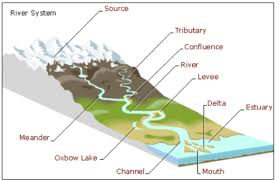

# 2.3.1 Arno

## Description: 
- Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. 
- The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

In [ ]:
arno = pd.read_csv("../input/acea-water-prediction/River_Arno.csv")
arno

In [ ]:
plot_nanCounts(arno)

In [ ]:
columns_viz(arno.drop(["Date"], axis=1))

# 2.4. [WATER SPRING](https://en.wikipedia.org/wiki/Spring_%28hydrology%29)

<center><img src="https://sswm.info/sites/default/files/inline-images/SMET%20%26%20WIJK%202002.%20Artesian%20%28fissure%29%20spring.png"></center>

# 2.4.1 Lupa 

## Description: 
- This water spring is located in the Rosciano Valley, on the left side of the Nera river. 
- The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. 
- It provides drinking water to the city of Terni and the towns around it.

In [ ]:
lupa = pd.read_csv("../input/acea-water-prediction/Water_Spring_Lupa.csv")
lupa

In [ ]:
plot_nanCounts(lupa)

In [ ]:
columns_viz(lupa.drop(["Date"], axis=1))

# 2.4.2 Madonna di Canneto

## Description: 
- The Madonna di Canneto spring is situated at an altitude of **1010m** above sea level in the Canneto valley. 
- It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

In [ ]:
mdc = pd.read_csv("../input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv")
mdc

In [ ]:
plot_nanCounts(mdc)

In [ ]:
columns_viz(mdc.drop(["Date"], axis=1))

# 2.4.3. Amiata

## Description: 
- The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. 
- This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. 
- The levels and volumes of the four sources are influenced by the parameters: 
    - rainfall
    - depth to groundwater
    - hydrometry
    - temperatures
    - drainage volumes.

In [ ]:
amiata = pd.read_csv("../input/acea-water-prediction/Water_Spring_Amiata.csv")
amiata

In [ ]:
plot_nanCounts(amiata)

In [ ]:
columns_viz(amiata.drop(["Date"], axis=1))

<h1 style="color:red">Work in Progress</h1>
If you liked the notebook, do upvote :)